<a href="https://colab.research.google.com/github/kid-116/ISTE-ML-SGP-21/blob/main/Week_3/Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b>ISTE ML-SGP 2021 - Week 2 Assignment</b></h1>


**Importing Libraries**

In [31]:
pip install category_encoders

     |████████████████████████████████| 81kB 4.2MB/s 


In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from google.colab import files
import io
import seaborn as sn
import missingno as msno
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Q1**

**Loading the dataset**

In [2]:
X = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]).reshape(-1, 1) # hours studies
y = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1) # percentage scored

**Visualizing the Dataset**

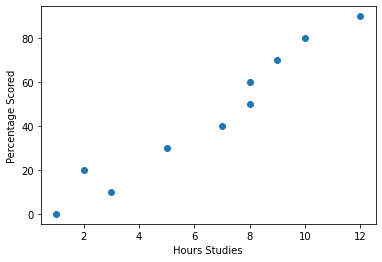

In [3]:
plt.scatter(X, y)
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scored')
plt.show()

It can be observed that a linear relationship exists.

**Training a Model**

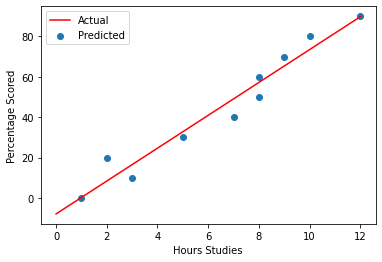

The model hence obtained is of the form y = [8.14345992]x - [7.93248945]


In [4]:
lr_model = LinearRegression()
lr_model.fit(X, y)
plt.scatter(X, y)
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Scored')
plt.plot(lr_model.predict(np.arange(0, 13, 1).reshape(-1, 1)), color='red')
plt.legend(['Actual', 'Predicted'])
plt.show()
print('The model hence obtained is of the form y = ', lr_model.coef_[0], 'x - ', abs(lr_model.predict(np.array([0]).reshape(-1, 1))[0]), sep='')

**Q2**

**Loading the Dataset**

In [5]:
X = np.arange(1, 11, 1).reshape(-1, 1) # level
y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]).reshape(-1, 1)

**Visualizing the Dataset**

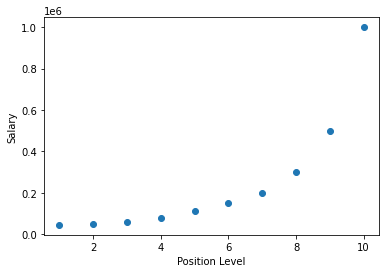

In [6]:
plt.scatter(X, y)
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

It seems that a second degree polynomial best suits the dataset.

**Training a Model**

In [7]:
def poly_reg(X, y, d):
  pr_model = PolynomialFeatures(degree=d)
  X_poly = pr_model.fit_transform(X)
  lr_model = LinearRegression()
  lr_model.fit(X_poly, y)
  plt.scatter(X, y)
  plt.xlabel('Position Level')
  plt.ylabel('Salary')
  plt.plot(X, lr_model.predict(X_poly), color='red')
  plt.legend(['Actual', 'Predicted'])
  plt.show()
  return lr_model.coef_

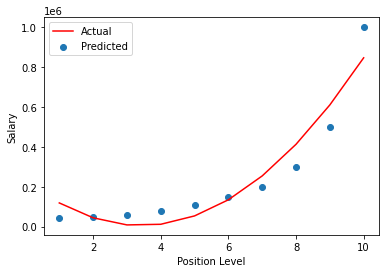

[[      0.         -132871.21212121   19431.81818182]]


In [8]:
print(poly_reg(X, y, 2))

Let us check out some models for higher degrees as well as this model is not that accurate.

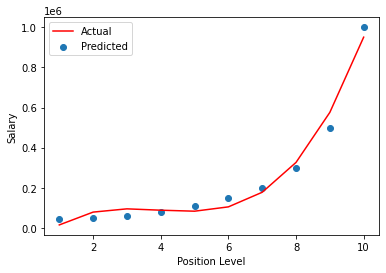

[[     0.         180664.33566432 -48548.95104895   4120.04662005]]


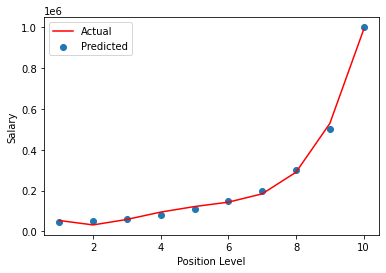

[[      0.         -211002.33100292   94765.44289063  -15463.28671331
      890.15151515]]


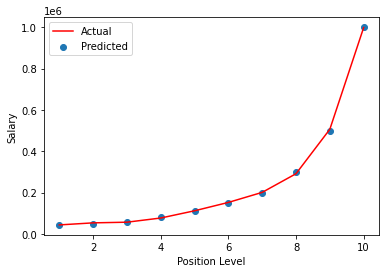

[[ 0.00000000e+00  1.60731002e+05 -1.00378788e+05  2.81649184e+04
  -3.44638695e+03  1.57692308e+02]]


In [9]:
print(poly_reg(X, y, 3))
print(poly_reg(X, y, 4))
print(poly_reg(X, y, 5))

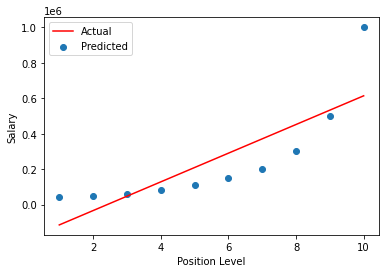

[[    0.         80878.78787879]]


In [10]:
print(poly_reg(X, y, 1))

It can be seen that setting degree to 1 which is the same as linear regression does not provide a useful hypothesis.

**Q3**

**Loading the Dataset**

In [11]:
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [39]:
df = pd.read_csv('Fish.csv', encoding='utf-16', sep='\t')

In [13]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


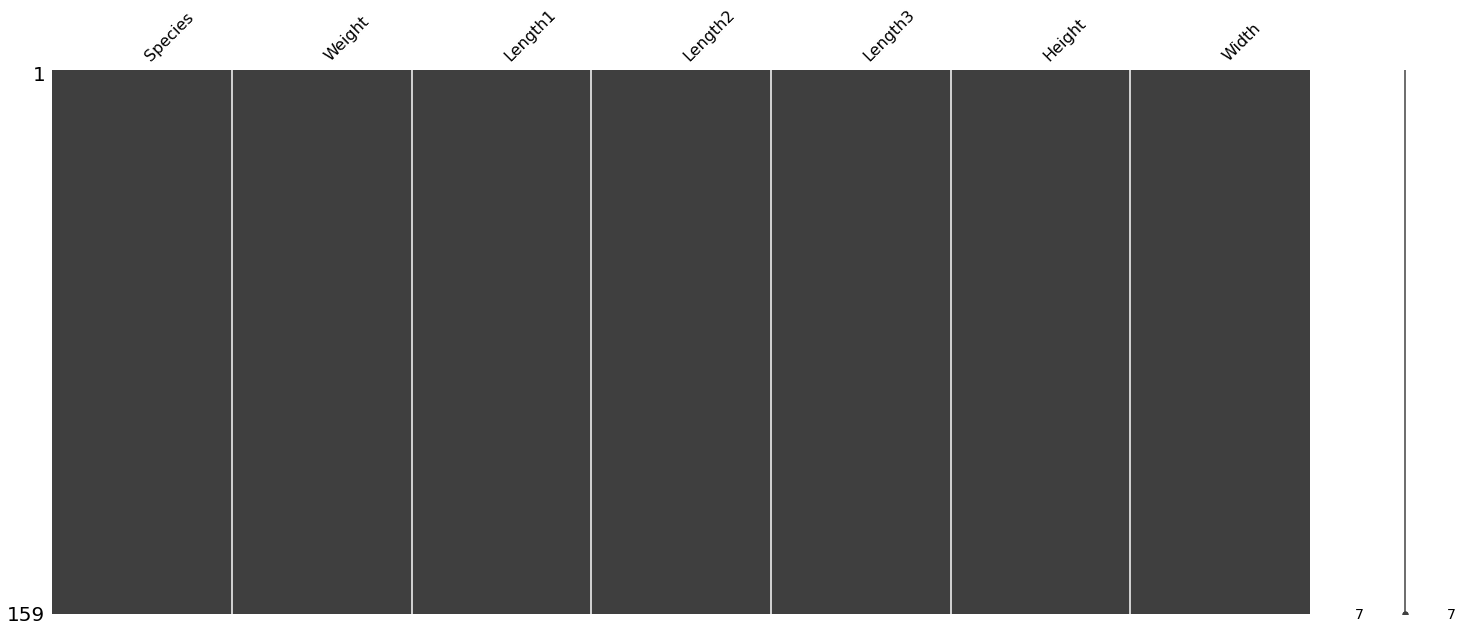

In [40]:
msno.matrix(df)

Data is complete.

**Encoding Species**

In [43]:
encoder = ce.OrdinalEncoder(
    cols = ['Species'], 
    return_df = True,
    mapping = [
               {
                   'col' : 'Species',
                   'mapping' : {
                       'Bream' : 1,
                       'Roach' : 2,
                       'Whitefish' : 3,
                       'Parkki' : 4,
                       'Perch' : 5,
                       'Pike' : 6,
                       'Smelt' : 7
                   }
               }
    ]
)
df_en = encoder.fit_transform(df)
df_en.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Species,Weight,Length1,Length2,Length3,Height,Width
0,1,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,430.0,26.5,29.0,34.0,12.4440,5.1340


**Checking Correlation**

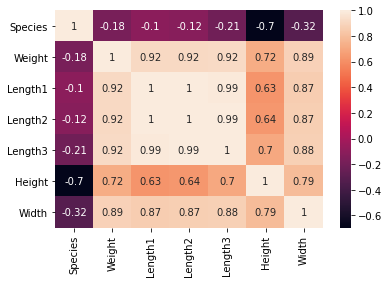

In [44]:
corr_mat = df_en.corr()
sn.heatmap(corr_mat, annot=True)
plt.show()

Using multivariate linear regression would be best for the dataset. Weight has strong correlation with most of the features except Species.